In [267]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [268]:
img = cv2.imread('building.jpg')


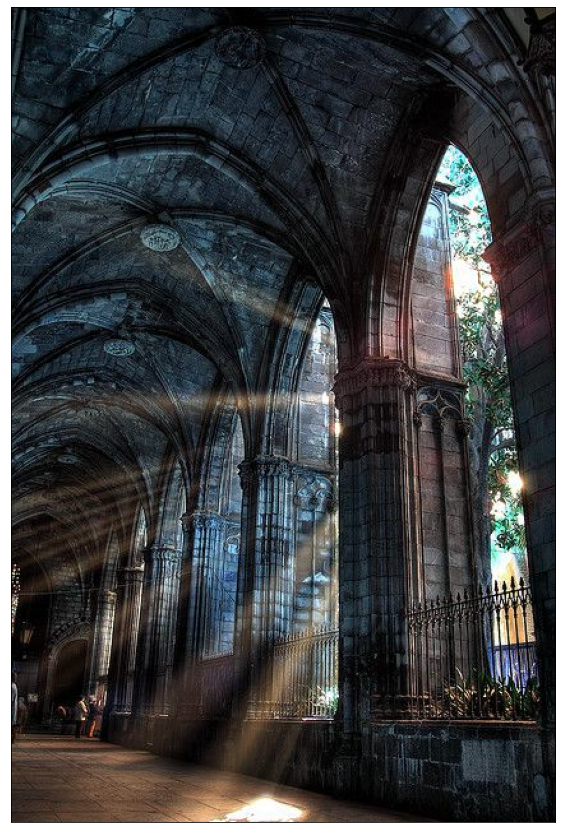

In [269]:
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

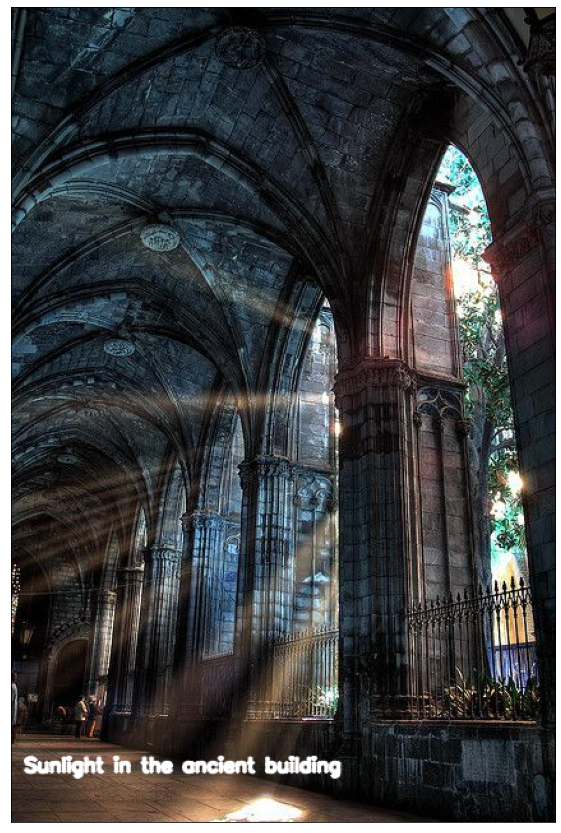

In [270]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'Sunlight in the ancient building',(10,600), font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [271]:
def nothing(x):
    pass

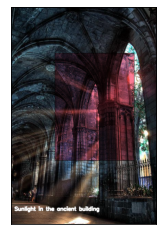

In [328]:
drawing = False 
mode = True 
bx,by,ax,ay = 0,0,1,1

def draw(event,x,y,flags,param):
    global bx,by,ax,ay,drawing,img,font,roi,rrr,rrb,rrg,rb,rg,rr,ix,iy,dst5,width,height
    
    if event == cv2.EVENT_LBUTTONDOWN:
        img = cv2.imread('building.jpg')
        bx,by,ax,ay = 0,0,1,1
        dst5=img[by:ay, bx:ax]
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img,'Sunlight in the ancient building',(10,600), font, 0.5,(255,255,255),2,cv2.LINE_AA)
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
                img = cv2.imread('building.jpg')
                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(img,'Sunlight in the ancient building',(10,600), font, 0.5,(255,255,255),2,cv2.LINE_AA)
                if x>=width-10:
                    x =width-10
                elif x<=10:
                    x=10
                elif y>=height-10:
                    y =height-10
                elif y<=10:
                    y=10
                cv2.rectangle(img,(ix,iy),(x,y),(0,0,0),0)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(img,(ix,iy),(x,y),(0,0,0),0)
        if ix < x and iy < y:
            ax = x
            ay = y
            bx = ix
            by = iy
        elif ix < x and iy > y:
            ax = x
            ay = iy
            bx = ix
            by = y
        elif ix > x and iy < y:
            ax = ix
            ay = y
            bx = x
            by = iy
        else:
            ax = ix
            ay = iy
            bx = x
            by = y

        roi=img[by:ay, bx:ax]
        zero = np.zeros(roi.shape[:2], dtype='uint8')
        rb,rg,rr = cv2.split(roi)
        rrb = cv2.merge((rb,zero,zero))
        rrg = cv2.merge((zero,rg,zero))
        rrr = cv2.merge((zero,zero,rr))
        


img = cv2.imread('building.jpg')
sp = img.shape
width=sp[1]
height=sp[0]
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'Sunlight in the ancient building',(10,600), font, 0.5,(255,255,255),2,cv2.LINE_AA)
roi=img[by:ay, bx:ax]
rb,rg,rr = cv2.split(roi)
zero = np.zeros(roi.shape[:2], dtype='uint8')
rrb = cv2.merge((rb,zero,zero))
rrg = cv2.merge((zero,rg,zero))
rrr = cv2.merge((zero,zero,rr))

cv2.namedWindow('image')
cv2.setMouseCallback('image',draw)
cv2.createTrackbar('R','image',0,100,nothing)
cv2.createTrackbar('G','image',0,100,nothing)
cv2.createTrackbar('B','image',0,100,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    
    dst1 = cv2.addWeighted(roi,0.,rrr,1.-r/100.,0)
    dst2 = cv2.addWeighted(roi,0.,rrb,1.-b/100.,0)
    dst3 = cv2.addWeighted(roi,0.,rrg,1.-g/100.,0)
    dst4 = cv2.add(dst1,dst2)
    dst5 = cv2.add(dst3,dst4)
    if img[by:ay, bx:ax].shape == dst5.shape:
        img[by:ay, bx:ax]=dst5
        
cv2.destroyAllWindows()
plt.imshow(img)
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()